# Figure 5
Divide-and-conquer state preparion proof of concept

In [1]:
import numpy as np
from encoding import Encoding
from qiskit import IBMQ, ClassicalRegister, QuantumRegister, QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import getpass

MY_API_TOKEN = getpass.getpass("Informe seu API_TOKEN: ")
IBMQ.enable_account(MY_API_TOKEN)
provider = IBMQ.get_provider(hub='ibm-q-research', group='Adenilton-Silva')

Informe seu API_TOKEN: ········


# Figure 5.b


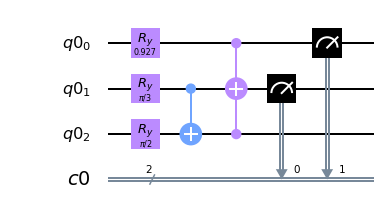

In [2]:
print('# Figure 5.b')
input_vector = np.array([np.sqrt(0.6), np.sqrt(0.2), np.sqrt(0.1), np.sqrt(0.1)])

betas = []
Encoding._recursive_compute_beta(input_vector, betas)
angles = []
for alist in betas:
    angles = angles + alist
    
qr = QuantumRegister(3)
cr = ClassicalRegister(2)
qcircuit = QuantumCircuit(qr, cr)

for k, value in enumerate(angles):
    qcircuit.ry(value, k)

qcircuit.cx(1,2)
qcircuit.ccx(0, 2, 1)

qcircuit.measure(1,0)
qcircuit.measure(0,1)

qcircuit.draw("mpl")

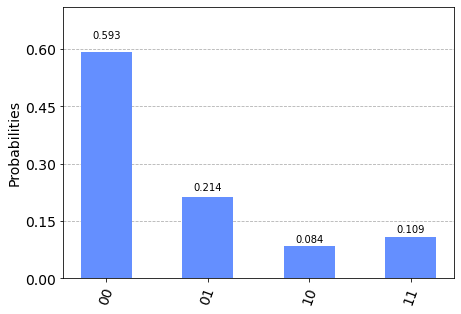

In [3]:
circuit = qcircuit
backend_sim = Aer.get_backend('qasm_simulator')
shots = 1024
job = execute(circuit, backend_sim, shots = shots, optimization_level=3)
results = job.result()
counts = results.get_counts()
# print(counts)
plot_histogram(counts)

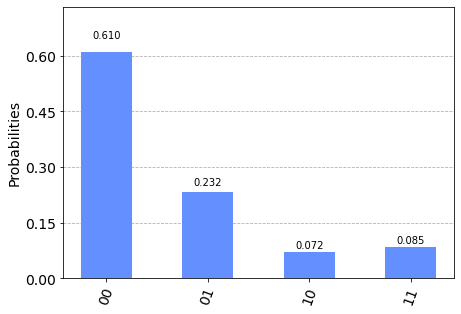

In [4]:
circuit = qcircuit
backend = provider.get_backend('ibmq_rome')
shots = 1024
layout = [0, 1, 2]
job = execute(circuit, backend, shots = shots, initial_layout=layout)
results = job.result()
counts_rome = results.get_counts()
plot_histogram(counts_rome)

Figure 5.a


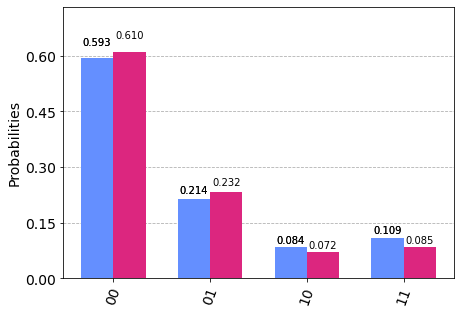

In [5]:
print('Figure 5.a')
plot_histogram([counts, counts_rome])